# Ploymorphism 
- many shapes
- same function name or operator used for different types
<br>



In [16]:
class Fish:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f"I am a fish, not a {self.name}"

    def speak(self):
        print(f"Fish {self.name} says blop blop")

class Fox:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f"I am a fox, no one knows how I sound."
    
    def speak(self):
        return NotImplemented

    
animals = [Fish("Fisky"), Fish("Goldy"), Fox("Vivi")]

for animal in animals:
    print(animal)
    animal.speak()
    

I am a fish, not a Fisky
Fish Fisky says blop blop
I am a fish, not a Goldy
Fish Goldy says blop blop
I am a fox, no one knows how I sound.


## Operator Overloading
Ability to define and use custom behavior of operators for your objects. This is achieved by implementing dunder or special methods that correspond to that operator.

- it gives additional functionality to an operator
- e.g. + is overloaded for strings, int, float etc.
- Note that there are more operators that can be overloaded than those specified in this list


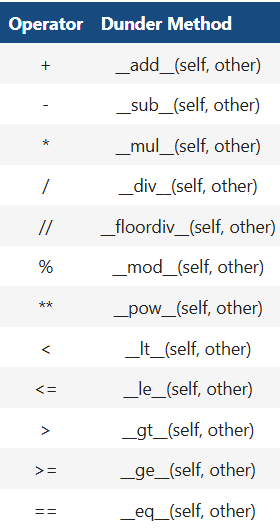


## Vector

In [17]:
from util1 import validate_number

class Vector:
    """
    A class representing a simple Euclidean vector.

    Attributes
    ----------
    numbers : tuple
        The numeric components of the vector.

    Methods
    -------
    numbers
        Returns the vector components.
    """

    def __init__(self, *numbers):
        """
        Initialize the Vector object with numeric components.

        Parameters
        ----------
        *numbers : int or float
            Variable-length argument list representing the vector components.

        Raises
        ------
        ValueError
            If no numbers are provided (empty vector).
        TypeError
            If any component is not a number.
        """
        # Print debug info (for demonstration only)
        print(type(numbers))   # tuple
        print(numbers)         # shows all the input numbers

        # Validate that every input is a number
        for number in numbers:
            validate_number(number)

        # Ensure the vector is not empty
        if len(numbers) <= 0:
            raise ValueError("Vector can't be empty")

        # Save the numbers as a tuple (immutable)
        self._numbers = numbers

    @property
    def numbers(self):
        """Return the vector’s numeric components."""
        return self._numbers


# -------------------------------
# Manual testing / demonstration
# -------------------------------

# ✅ Valid vector with two numeric components
v1 = Vector(1, 2)

# ❌ Invalid vector (string instead of number)
try:
    v2 = Vector("1", 2)
except TypeError as err:
    print(err)

# ❌ Invalid vector (no numbers provided)
try:
    v2 = Vector()
except ValueError as err:
    print(err)


<class 'tuple'>
(1, 2)
<class 'tuple'>
('1', 2)
value must be number not <class 'str'>
<class 'tuple'>
()
Vector can't be empty


## Another Vector Exercise

| Concept               | Meaning                                                      |
| --------------------- | ------------------------------------------------------------ |
| `*numbers`            | lets you pass any number of arguments (e.g. Vector(1,2,3))   |
| `@property`           | makes `numbers` read-only (can be accessed but not modified) |
| `__repr__`            | controls how the object prints                               |
| `__len__`             | lets you use `len(v3)`                                       |
| `__add__`, `__sub__`  | overload `+` and `-` operators                               |
| `__getitem__`         | lets you use index/slice like a list                         |
| `__mul__`, `__rmul__` | handle scalar multiplication from both sides                 |


In [18]:
from numbers import Number

def validate_number(value):
    """Helper function to make sure the input is a number (int or float)."""
    if not isinstance(value, Number):
        raise TypeError(f"value must be a number, not {type(value)}")


class Vector:
    """
    A class representing a Euclidean vector.

    A vector is simply a collection of numbers (coordinates), such as (1, 2) or (3, 4, 5),
    and supports arithmetic operations like addition, subtraction, and scalar multiplication.

    Attributes
    ----------
    numbers : tuple
        A tuple containing all the numeric elements of the vector.

    Methods
    -------
    __len__()        -> allows len(Vector)
    __add__()        -> adds two vectors element by element
    __sub__()        -> subtracts two vectors element by element
    __getitem__()    -> allows index/slice access like Vector[0] or Vector[1:]
    __mul__()        -> multiplies vector by a number (scalar)
    __rmul__()       -> enables number * vector
    """

    def __init__(self, *numbers):
        """
        Initialize a Vector object with numeric components.

        Parameters
        ----------
        *numbers : int or float
            The components of the vector (e.g. Vector(1, 2, 3))

        Raises
        ------
        TypeError
            If any of the components is not a number.
        ValueError
            If no numbers are provided (empty vector).
        """
        # Validation loop
        for number in numbers:
            validate_number(number)

        if len(numbers) <= 0:
            raise ValueError("Vector can't be empty")

        # Store values as a tuple (immutable)
        self._numbers = numbers

    # -------------------
    #  Read-only property
    # -------------------
    @property
    def numbers(self) -> tuple:
        """Return the vector’s components as a tuple."""
        return self._numbers

    # -------------------
    #  Object display
    # -------------------
    def __repr__(self):
        """Return a developer-friendly string representation."""
        return f"Vector{self.numbers}"

    # -------------------
    #  Operator overloading
    # -------------------
    def __len__(self) -> int:
        """Enable len(Vector) to return number of components."""
        return len(self.numbers)

    def __add__(self, other: "Vector") -> "Vector":
        """Add two vectors element by element."""
        # zip pairs up values from both vectors
        numbers = (a + b for a, b in zip(self.numbers, other.numbers))
        return Vector(*numbers)

    def __sub__(self, other: "Vector") -> "Vector":
        """Subtract two vectors element by element."""
        numbers = (a - b for a, b in zip(self.numbers, other.numbers))
        return Vector(*numbers)

    def __getitem__(self, item: int) -> Number:
        """Allow indexing or slicing (e.g. v[0] or v[1:])."""
        return self.numbers[item]

    def __mul__(self, number: Number) -> "Vector":
        """Multiply vector by a scalar (e.g. v * 3)."""
        numbers = (number * a for a in self.numbers)
        return Vector(*numbers)

    def __rmul__(self, number: Number) -> "Vector":
        """Enable scalar multiplication from left side (e.g. 3 * v)."""
        return self * number


# -----------------------------
#  Example usage and tests
# -----------------------------

v3 = Vector(1, 1)
v4 = Vector(1, 2, 41, 5, 2, 6)
v5 = Vector(2, -1)

print(f"{len(v3) = }")   # → 2
print(f"{len(v4) = }")   # → 6
print(f"{v3 = }")        # → Vector(1, 1)
print(f"{v5 = }")        # → Vector(2, -1)
print(f"{v5 + v3 = }")   # → Vector(3, 0)
print(f"{v3 + v5 = }")   # → Vector(3, 0)
print(f"{v3 - v5 = }")   # → Vector(-1, 2)
print(f"{v4[-1] = }")    # → last element (6)
print(f"{v4[2:] = }")    # → slice of vector (41, 5, 2, 6)
print(f"{v3 * 5 = }")    # → multiply each element by 5
print(5 * v3)            # → same result as above because of __rmul__


len(v3) = 2
len(v4) = 6
v3 = Vector(1, 1)
v5 = Vector(2, -1)
v5 + v3 = Vector(3, 0)
v3 + v5 = Vector(3, 0)
v3 - v5 = Vector(-1, 2)
v4[-1] = 6
v4[2:] = (41, 5, 2, 6)
v3 * 5 = Vector(5, 5)
Vector(5, 5)


In [19]:

l1 = [1,2,3]
l1[-1]


3

In [20]:

v3 + v4

Vector(2, 3)

In [21]:

print(len([1,2]))

len(v3), len(v4)

2


(2, 6)

In [22]:
for a,b in zip((1,2,3), (-1,-2,-3)):
    print(a, b)

1 -1
2 -2
3 -3
